In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [219]:
import warnings
warnings.filterwarnings('ignore')

In [220]:
### Import Data

In [221]:
df = pd.read_csv('satisfaction.csv')
df.head()

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


## Definisi masalah
### EDA
- Untuk mengetahui kepuasan tiap karyawan dengan variable yang ada
### ML
- Untuk memprediksi kepuasan karyawan dengan variable yang ada

## Defining Project Goals
- Memprediksi kepuasan karyawan untuk keberlangsungan perusahaan yang lebih baik dengan melihat variable yang ada

In [222]:
### Data Exploration

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        500 non-null    int64 
 1   emp_id            500 non-null    object
 2   age               500 non-null    int64 
 3   Dept              500 non-null    object
 4   location          500 non-null    object
 5   education         500 non-null    object
 6   recruitment_type  500 non-null    object
 7   job_level         500 non-null    int64 
 8   rating            500 non-null    int64 
 9   onsite            500 non-null    int64 
 10  awards            500 non-null    int64 
 11  certifications    500 non-null    int64 
 12  salary            500 non-null    int64 
 13  satisfied         500 non-null    int64 
dtypes: int64(9), object(5)
memory usage: 54.8+ KB


In [224]:
df.isna().sum()

Unnamed: 0          0
emp_id              0
age                 0
Dept                0
location            0
education           0
recruitment_type    0
job_level           0
rating              0
onsite              0
awards              0
certifications      0
salary              0
satisfied           0
dtype: int64

In [225]:
### Untuk Mengecek Data Balance atau Imbalance

In [226]:
(df['satisfied'].value_counts()/len(df)*100).round(2)

1    52.6
0    47.4
Name: satisfied, dtype: float64

In [227]:
(pd.crosstab(index=df['satisfied'], columns='count', normalize=True)*100).round(2)

col_0,count
satisfied,
0,47.4
1,52.6


In [228]:
df.describe()

,Unnamed: 0,age,job_level,rating,onsite,awards,certifications,salary,satisfied
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,38.610000,3.032000,3.072000,0.466000,4.538000,0.496000,50416.056000,0.526000
std,144.481833,9.438648,1.423738,1.425089,0.499342,2.853215,0.500485,23671.392661,0.499824
min,0.000000,23.000000,1.000000,1.000000,0.000000,0.000000,0.000000,24076.000000,0.000000
25%,124.750000,30.000000,2.000000,2.000000,0.000000,2.000000,0.000000,29805.000000,0.000000
50%,249.500000,39.000000,3.000000,3.000000,0.000000,5.000000,0.000000,42419.000000,1.000000
75%,374.250000,47.000000,4.000000,4.000000,1.000000,7.000000,1.000000,65715.000000,1.000000
max,499.000000,54.000000,5.000000,5.000000,1.000000,9.000000,1.000000,86750.000000,1.000000


In [229]:
df.describe(include='O')

,emp_id,Dept,location,education,recruitment_type
count,500,500,500,500,500
unique,499,5,2,2,4
top,MKT7287,Purchasing,City,PG,On-Campus
freq,2,109,259,254,133


In [230]:
### EDA

In [231]:
pd.crosstab(index=df['age'], columns=df['satisfied'], normalize='index')*100

satisfied,0,1
age,,
23,41.666667,58.333333
24,47.368421,52.631579
25,68.421053,31.578947
26,57.894737,42.105263
27,50.000000,50.000000
28,46.666667,53.333333
29,27.272727,72.727273
30,64.705882,35.294118
31,46.153846,53.846154


In [232]:
### mengelompokan usia dengan kepuasan

In [233]:
age_bin = [20, 40, df['age'].max()]

In [234]:
labels = ['Junior', 'senior']

In [235]:
df['age_bin'] = pd.cut(df['age'], bins=age_bin, labels = labels)

In [236]:
((df[['age_bin', 'satisfied']].groupby(['age_bin']).mean())*100).sort_values(by='satisfied', ascending=False)

,satisfied
age_bin,
Junior,54.121864
senior,50.678733


In [237]:
pd.crosstab(index=df['Dept'], columns=df['satisfied'], normalize='index')*100

satisfied,0,1
Dept,,
HR,50.000000,50.000000
Marketing,53.684211,46.315789
Purchasing,43.119266,56.880734
Sales,44.565217,55.434783
Technology,45.918367,54.081633


In [238]:
pd.crosstab(index=df['location'], columns=df['satisfied'], normalize='index')*100

satisfied,0,1
location,,
City,45.945946,54.054054
Suburb,48.962656,51.037344


In [239]:
pd.crosstab(index=df['education'], columns=df['satisfied'], normalize='index')*100

satisfied,0,1
education,,
PG,46.062992,53.937008
UG,48.780488,51.219512


In [240]:
pd.crosstab(index=df['recruitment_type'], columns=df['satisfied'], normalize='index')*100

satisfied,0,1
recruitment_type,,
On-Campus,45.864662,54.135338
Recruitment Agency,45.370370,54.629630
Referral,48.091603,51.908397
Walk-in,50.000000,50.000000


In [241]:
pd.crosstab(index=df['job_level'], columns=df['satisfied'], normalize='index')*100

satisfied,0,1
job_level,,
1,43.157895,56.842105
2,51.818182,48.181818
3,50.000000,50.000000
4,48.181818,51.818182
5,43.689320,56.310680


In [242]:
pd.crosstab(index=df['rating'], columns=df['satisfied'], normalize='index')*100

satisfied,0,1
rating,,
1,53.684211,46.315789
2,48.484848,51.515152
3,52.873563,47.126437
4,44.247788,55.752212
5,39.622642,60.377358


In [243]:
pd.crosstab(index=df['onsite'], columns=df['satisfied'], normalize='index')*100

satisfied,0,1
onsite,,
0,48.689139,51.310861
1,45.922747,54.077253


In [244]:
pd.crosstab(index=df['awards'], columns=df['satisfied'], normalize='index')*100

satisfied,0,1
awards,,
0,38.461538,61.538462
1,48.780488,51.219512
2,60.416667,39.583333
3,56.140351,43.859649
4,43.137255,56.862745
5,48.076923,51.923077
6,41.304348,58.695652
7,36.000000,64.000000
8,53.571429,46.428571


In [245]:
pd.crosstab(index=df['certifications'], columns=df['satisfied'], normalize='index')*100

satisfied,0,1
certifications,,
0,46.825397,53.174603
1,47.983871,52.016129


In [246]:
### pengelompokan kepuasan dengan gaji

In [247]:
gaji_bin = [10000, 40000, 60000, 80000, df['salary'].max()]

In [248]:
labels = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']

In [249]:
df['gaji_bin'] = pd.cut(df['salary'], bins=gaji_bin, labels = labels)

In [250]:
((df[['gaji_bin', 'satisfied']].groupby(['gaji_bin']).mean())*100).sort_values(by='satisfied', ascending=False)

,satisfied
gaji_bin,
Sangat Tinggi,56.310680
Rendah,52.195122
Tinggi,51.818182
Sedang,50.000000


In [251]:
### Data Visualization

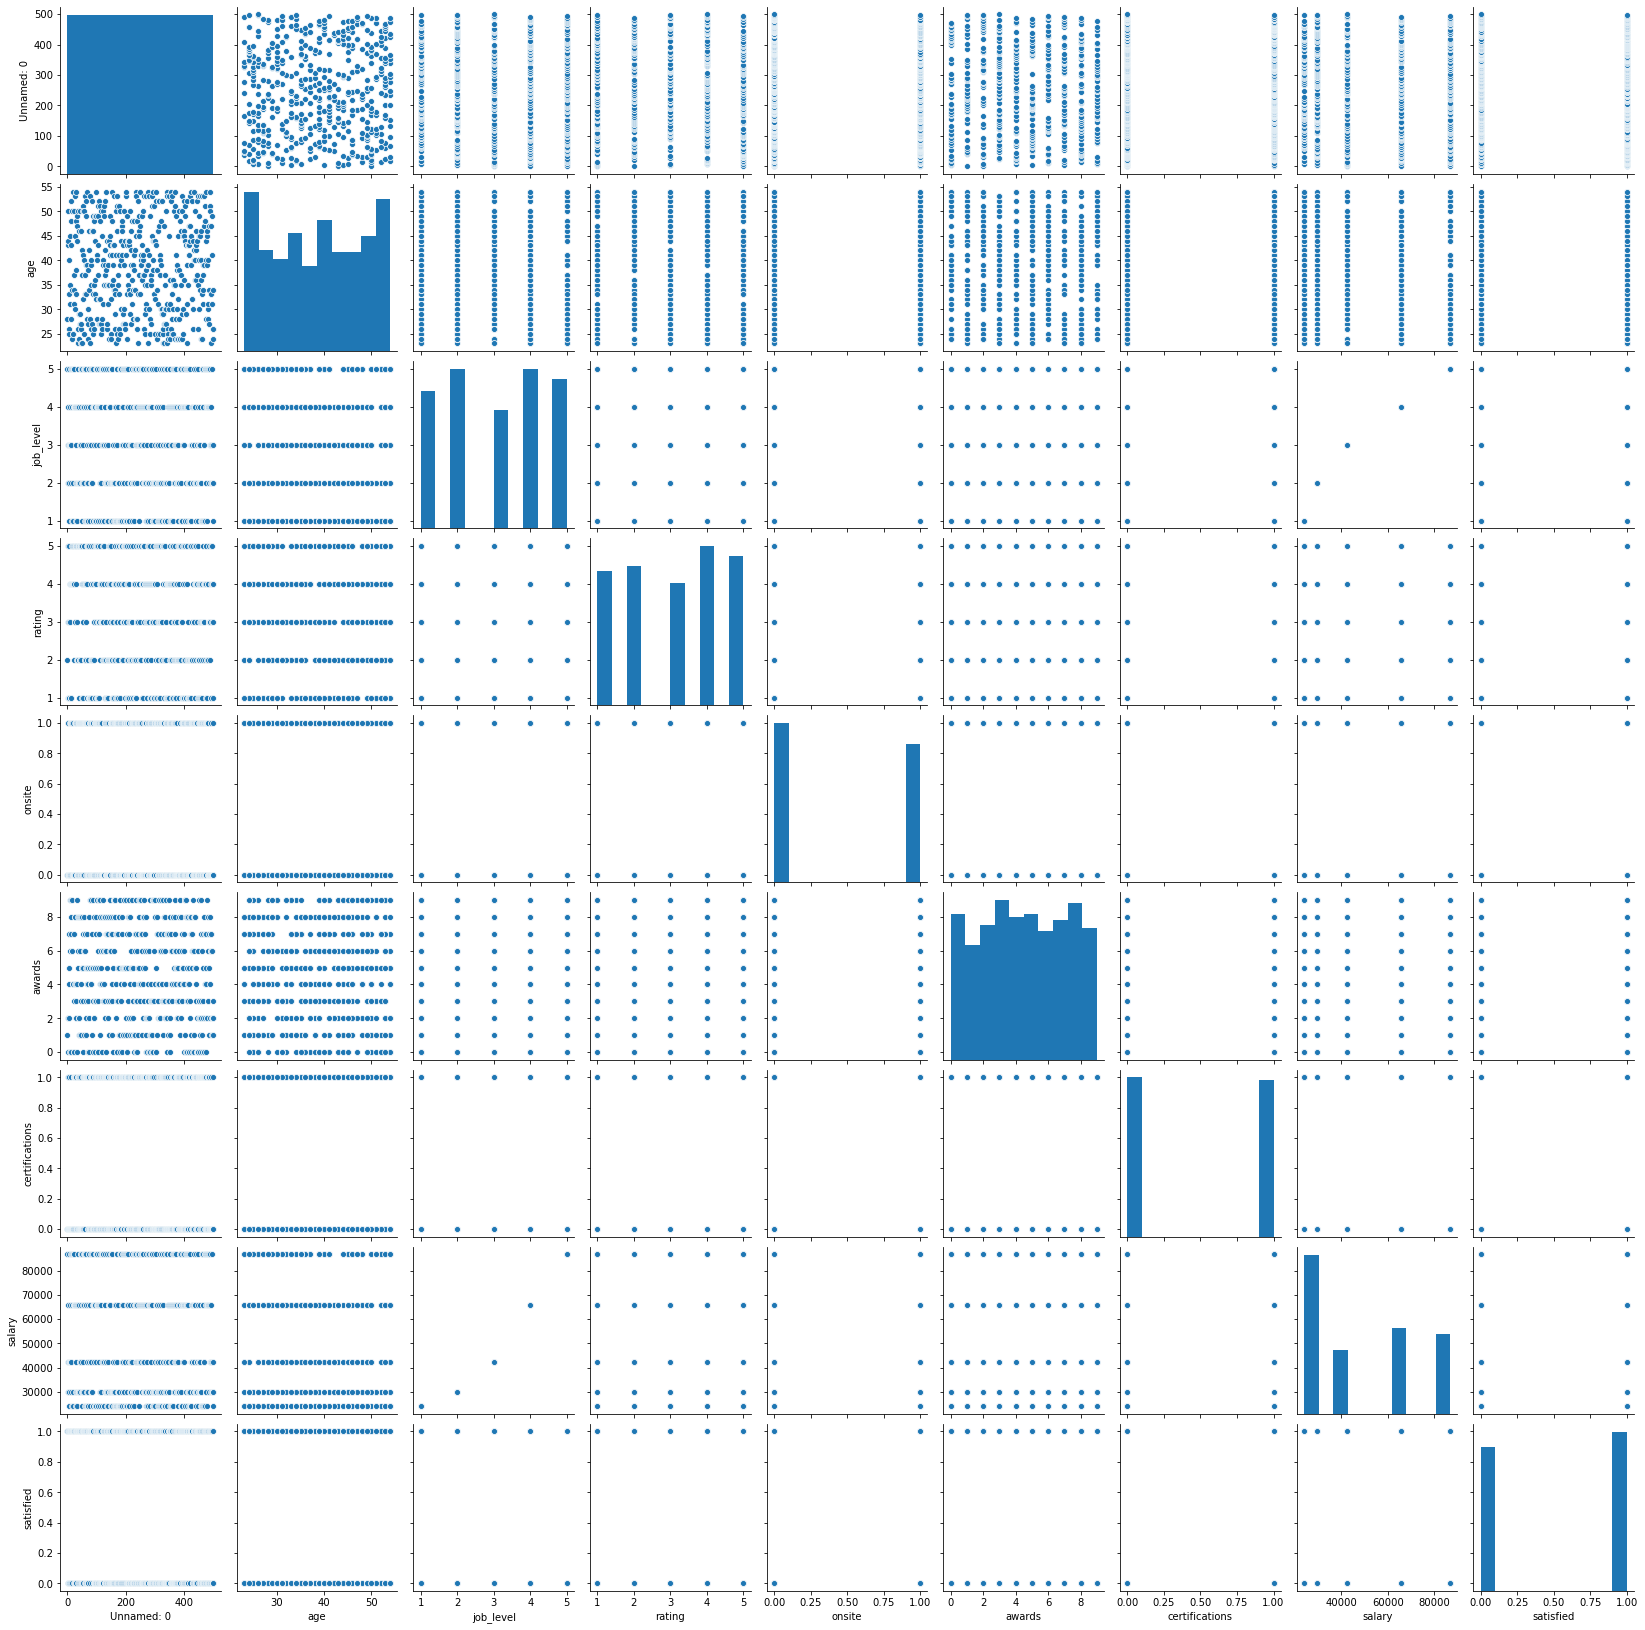

In [252]:
sns.pairplot(df)

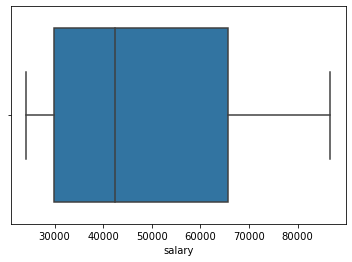

In [197]:
sns.boxplot(df['salary'])

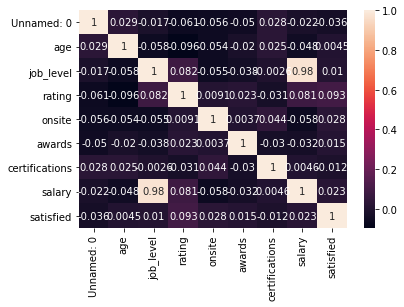

In [198]:
sns.heatmap(df.corr(), annot=True)

In [117]:
### Preprocessing

In [253]:
### One Hot Encoding
df = pd.get_dummies(data=df, columns=['Dept'])

In [254]:
df = pd.get_dummies(data=df, columns=['location'])

In [255]:
df = pd.get_dummies(data=df, columns=['recruitment_type'])

In [256]:
df.head()

,Unnamed: 0,emp_id,age,education,job_level,rating,onsite,awards,certifications,salary,...,Dept_Marketing,Dept_Purchasing,Dept_Sales,Dept_Technology,location_City,location_Suburb,recruitment_type_On-Campus,recruitment_type_Recruitment Agency,recruitment_type_Referral,recruitment_type_Walk-in
0,0,HR8270,28,PG,5,2,0,1,0,86750,...,0,0,0,0,0,1,0,0,1,0
1,1,TECH1860,50,PG,3,5,1,2,1,42419,...,0,0,0,1,0,1,0,0,0,1
2,2,TECH6390,43,UG,4,1,0,2,0,65715,...,0,0,0,1,0,1,0,0,1,0
3,3,SAL6191,44,PG,2,3,1,0,0,29805,...,0,0,1,0,1,0,1,0,0,0
4,4,HR6734,33,UG,2,1,0,5,0,29805,...,0,0,0,0,1,0,0,1,0,0


In [257]:
df.drop(columns=['Unnamed: 0','emp_id', 'education', 'gaji_bin', 'age_bin'], inplace=True)

In [258]:
df.head()

,age,job_level,rating,onsite,awards,certifications,salary,satisfied,Dept_HR,Dept_Marketing,Dept_Purchasing,Dept_Sales,Dept_Technology,location_City,location_Suburb,recruitment_type_On-Campus,recruitment_type_Recruitment Agency,recruitment_type_Referral,recruitment_type_Walk-in
0,28,5,2,0,1,0,86750,1,1,0,0,0,0,0,1,0,0,1,0
1,50,3,5,1,2,1,42419,0,0,0,0,0,1,0,1,0,0,0,1
2,43,4,1,0,2,0,65715,0,0,0,0,0,1,0,1,0,0,1,0
3,44,2,3,1,0,0,29805,1,0,0,0,1,0,1,0,1,0,0,0
4,33,2,1,0,5,0,29805,1,1,0,0,0,0,1,0,0,1,0,0


In [259]:
df.head()

,age,job_level,rating,onsite,awards,certifications,salary,satisfied,Dept_HR,Dept_Marketing,Dept_Purchasing,Dept_Sales,Dept_Technology,location_City,location_Suburb,recruitment_type_On-Campus,recruitment_type_Recruitment Agency,recruitment_type_Referral,recruitment_type_Walk-in
0,28,5,2,0,1,0,86750,1,1,0,0,0,0,0,1,0,0,1,0
1,50,3,5,1,2,1,42419,0,0,0,0,0,1,0,1,0,0,0,1
2,43,4,1,0,2,0,65715,0,0,0,0,0,1,0,1,0,0,1,0
3,44,2,3,1,0,0,29805,1,0,0,0,1,0,1,0,1,0,0,0
4,33,2,1,0,5,0,29805,1,1,0,0,0,0,1,0,0,1,0,0


In [260]:
### Splitting Data

In [288]:
from sklearn.model_selection import train_test_split

In [289]:
X = df.drop(columns='satisfied')
y = df['satisfied']

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, stratify = y,random_state = 42)

In [291]:
### Machine Learning Modelling

In [292]:
from sklearn.linear_model import LogisticRegression

In [293]:
## Model Logistic Regression Base

In [294]:
modelLog = LogisticRegression()

In [295]:
modelLog.fit(X_train, y_train)

LogisticRegression()

In [296]:
modelLog.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [297]:
from sklearn.neighbors import KNeighborsClassifier

In [298]:
### Model KNN Base

In [299]:
modelKNN = KNeighborsClassifier()

In [300]:
modelKNN.fit(X_train, y_train)

KNeighborsClassifier()

In [301]:
modelKNN.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [302]:
### Evaluation Metrics

In [303]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [304]:
### Evaluasi LogReg Base

In [305]:
y_pred = modelLog.predict(X_test)

In [306]:
acc_LogReg = accuracy_score(y_test, y_pred)
acc_LogReg

0.53

In [307]:
prec_Log = precision_score(y_test, y_pred)

In [308]:
rec_Log = recall_score(y_test, y_pred, pos_label=1)

In [309]:
f1_Log = f1_score(y_test, y_pred)

In [310]:
recall_score(y_test, y_pred, pos_label=0)

0.0

In [311]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.53      1.00      0.69        53

    accuracy                           0.53       100
   macro avg       0.27      0.50      0.35       100
weighted avg       0.28      0.53      0.37       100



In [312]:
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

In [313]:
df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

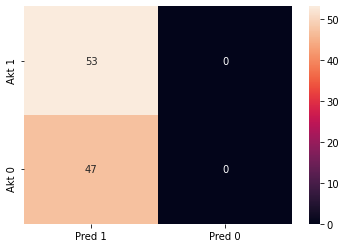

In [314]:
sns.heatmap(df_cm, annot=True)
plt.show()

In [315]:
### Evaluation Matrix Base KNN

In [316]:
y_KNN = modelKNN.predict(X_test)

In [317]:
acc_KNN = accuracy_score(y_test, y_KNN)
acc_KNN

0.53

In [318]:
prec_KNN = precision_score(y_test, y_KNN)

In [319]:
rec_KNN = recall_score(y_test, y_KNN)

In [320]:
f1_KNN = f1_score(y_test, y_KNN)

In [321]:
print(classification_report(y_test, y_KNN))

              precision    recall  f1-score   support

           0       0.50      0.49      0.49        47
           1       0.56      0.57      0.56        53

    accuracy                           0.53       100
   macro avg       0.53      0.53      0.53       100
weighted avg       0.53      0.53      0.53       100



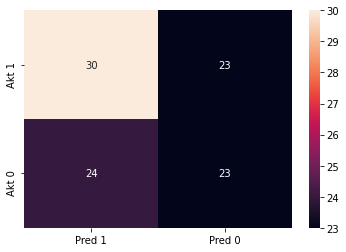

In [322]:
cm_KNN = confusion_matrix(y_test, y_KNN, labels=[1, 0])
df_KNN = pd.DataFrame(data=cm_KNN, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_KNN, annot=True)
plt.show()

In [343]:
data = {
    "LogReg" : [acc_LogReg, prec_Log, rec_Log, f1_Log],
    "KNN" : [acc_KNN, prec_KNN, rec_KNN, f1_KNN]
}
pd.DataFrame(data=data, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

,LogReg,KNN
Accuracy,0.53000,0.530000
Precision,0.53000,0.555556
Recall,1.00000,0.566038
F1 Score,0.69281,0.560748


### Kesimpulan
- Kedua model memiliki nilai akurasi yang sama
- nilai precision KNN memiliki nilai yang lebih tinggi
- nilai Recall LogReg memiliki nilai yang lebih tinggi
- nilai F1 score LogReg memiliki nilai yang lebih tinggi
### Saran
- Model Logistic regretion memiliki nilai yang lebih baik dari pada KNN untuk kasus menilai kepuasan karyawan terhadap aspek aspek ini

In [344]:
### classification Random Forest


In [345]:
from sklearn.ensemble import RandomForestClassifier

In [346]:
model_RF = RandomForestClassifier()

In [347]:
model_RF.fit(X_train, y_train)

RandomForestClassifier()

In [348]:
model_RF.predict(X_test)

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [349]:
### Probability untuk Maing-masing kelas
1 => Puas
0 => Tidak puas

SyntaxError: invalid syntax (<ipython-input-349-c57bd223feb3>, line 2)

In [350]:
model_RF.predict_proba(X_test)[2][0]*100

34.0

In [351]:
X_train.head()

,age,job_level,rating,onsite,awards,certifications,salary,Dept_HR,Dept_Marketing,Dept_Purchasing,Dept_Sales,Dept_Technology,location_City,location_Suburb,recruitment_type_On-Campus,recruitment_type_Recruitment Agency,recruitment_type_Referral,recruitment_type_Walk-in
256,49,4,1,1,7,0,65715,0,0,1,0,0,1,0,0,0,0,1
292,40,2,1,0,9,0,29805,0,0,0,0,1,0,1,0,0,0,1
387,35,5,3,0,8,0,86750,0,0,0,1,0,1,0,1,0,0,0
102,28,5,5,0,5,0,86750,0,0,1,0,0,0,1,1,0,0,0
54,32,4,4,1,0,0,65715,0,0,0,1,0,0,1,0,0,0,1


In [356]:
Rey = [29, 3, 5, 1, 9, 2, 70000, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1]

In [357]:
model_RF.predict([Rey])[0]

1

In [362]:
model_RF.predict_proba([Rey])[0][1]*100

60.0

In [359]:
Rani = [50, 5, 1, 1, 9, 0, 30000, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1]

In [360]:
model_RF.predict([Rey])[0]

1

In [361]:
model_RF.predict_proba([Rani])[0][1]*100

45.0

In [363]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [364]:
y_pred = model_RF.predict(X_test)

In [365]:
roc_auc_score(y_test, y_pred)

0.47450822962665595

In [366]:
y_proba = model_RF.predict_proba(X_test)

In [367]:
pred_1 = y_proba[ : , 1]

In [368]:
roc_curve(y_test, pred_1)

(array([0.        , 0.0212766 , 0.04255319, 0.04255319, 0.04255319,
        0.06382979, 0.06382979, 0.08510638, 0.08510638, 0.08510638,
        0.12765957, 0.19148936, 0.21276596, 0.23404255, 0.25531915,
        0.31914894, 0.34042553, 0.34042553, 0.36170213, 0.40425532,
        0.46808511, 0.4893617 , 0.53191489, 0.55319149, 0.61702128,
        0.61702128, 0.65957447, 0.68085106, 0.68085106, 0.70212766,
        0.74468085, 0.76595745, 0.76595745, 0.80851064, 0.82978723,
        0.87234043, 0.89361702, 0.89361702, 0.91489362, 0.91489362,
        0.93617021, 0.93617021, 0.95744681, 0.9787234 , 1.        ]),
 array([0.        , 0.        , 0.        , 0.0754717 , 0.09433962,
        0.11320755, 0.1509434 , 0.1509434 , 0.16981132, 0.20754717,
        0.22641509, 0.24528302, 0.24528302, 0.26415094, 0.26415094,
        0.26415094, 0.26415094, 0.33962264, 0.37735849, 0.37735849,
        0.39622642, 0.41509434, 0.45283019, 0.49056604, 0.50943396,
        0.56603774, 0.58490566, 0.64150943, 0.

In [369]:
fpr, tpr, threshold = roc_curve(y_test, pred_1)

In [370]:
### AUC = Area Under Curve
score_auc = round(auc(fpr, tpr),2)

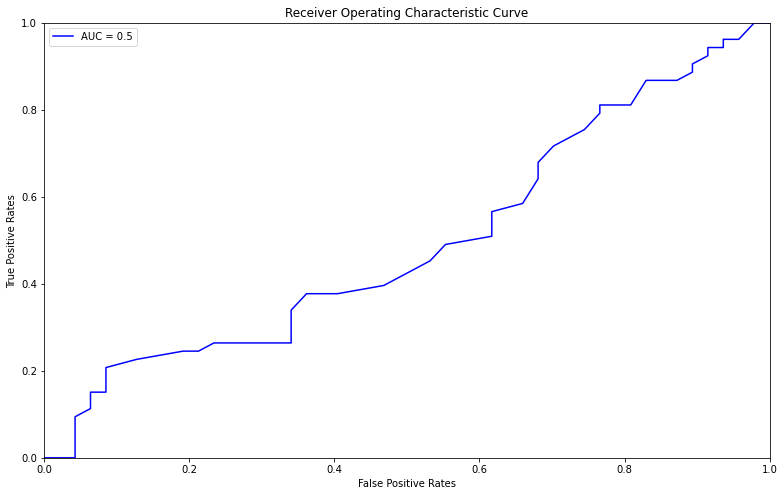

In [371]:
plt.figure(figsize=(13, 8))
plt.plot(fpr, tpr, 'b', label=f"AUC = {score_auc}")
# plt.plot([0, 1], [0, 1], 'r-.')
plt.xlim([0 , 1])
plt.ylim([0 , 1])
plt.xlabel("False Positive Rates")
plt.ylabel("True Positive Rates")
plt.title("Receiver Operating Characteristic Curve")
plt.legend()
plt.show()